# Data

In [10]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

mean=np.mean(X_train)
std =np.std(X_train)

# normalize
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)

# one hot
num_classes=10
y_train=np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# reshape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Model

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

def LeNet5():
    model = Sequential()

    # Conv1
    model.add(Conv2D(6, kernel_size=5, strides=1, activation='tanh', padding='same', input_shape=(28,28,1)))
    
    # AvgPool2
    model.add(AveragePooling2D(pool_size=2, strides=2, padding='valid')) # valid == no padding

    # Conv3
    model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation='tanh', padding='valid'))

    # AvgPool4
    model.add(AveragePooling2D(pool_size=2, strides=2, padding='valid'))
    
    # Conv5
    model.add(Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'))

    model.add(Flatten())

    # FC6
    model.add(Dense(units=84, activation='tanh'))

    # FC7
    model.add(Dense(units=10, activation='softmax'))

    return model

In [19]:
def LeNet5_relu():
    model = Sequential()

    # Conv1
    model.add(Conv2D(6, kernel_size=5, strides=1, activation='relu', padding='same', input_shape=(28,28,1)))
    
    # AvgPool2
    model.add(AveragePooling2D(pool_size=2, strides=2, padding='valid')) # valid == no padding

    # Conv3
    model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation='relu', padding='valid'))

    # AvgPool4
    model.add(AveragePooling2D(pool_size=2, strides=2, padding='valid'))
    
    # Conv5
    model.add(Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid'))

    model.add(Flatten())

    # FC6
    model.add(Dense(units=84, activation='relu'))

    # FC7
    model.add(Dense(units=10, activation='softmax'))

    return model

In [12]:
model=LeNet5()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

In [20]:
model_relu=LeNet5_relu()
model_relu.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_2 (Flatten)         (None, 120)              

# Train

In [13]:
def lr_schedule(epoch):
    if epoch <=2:
        return 5e-4
    elif epoch <=5:
        return 2e-4
    elif epoch <=9:
        return 5e-5
    return 1e-5

In [17]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

lr_scheduler=LearningRateScheduler(lr_schedule)
checkpoint = ModelCheckpoint(filepath='./LeNet5.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True)

callbacks=[checkpoint, lr_scheduler]

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

hist=model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), callbacks=callbacks, verbose=2, shuffle=True)


Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.89120, saving model to .\LeNet5.hdf5
1875/1875 - 7s - loss: 0.4913 - accuracy: 0.8787 - val_loss: 0.4476 - val_accuracy: 0.8912 - lr: 5.0000e-04 - 7s/epoch - 4ms/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.89120 to 0.89810, saving model to .\LeNet5.hdf5
1875/1875 - 6s - loss: 0.4473 - accuracy: 0.8874 - val_loss: 0.4114 - val_accuracy: 0.8981 - lr: 5.0000e-04 - 6s/epoch - 3ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.89810 to 0.90190, saving model to .\LeNet5.hdf5
1875/1875 - 6s - loss: 0.4152 - accuracy: 0.8930 - val_loss: 0.3843 - val_accuracy: 0.9019 - lr: 5.0000e-04 - 6s/epoch - 3ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.90190 to 0.90400, saving model to .\LeNet5.hdf5
1875/1875 - 6s - loss: 0.3970 - accuracy: 0.8964 - val_loss: 0.3749 - val_accuracy: 0.9040 - lr: 2.0000e-04 - 6s/epoch - 3ms/step
Epoch 5/20

Epoch 5: val_accuracy improved from 0.90400 to 0.90450, saving model to .\LeNet

In [23]:
model_relu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

checkpoint_relu = ModelCheckpoint(filepath='./LeNet5_relu.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True)

callbacks_relu=[checkpoint_relu, lr_scheduler]

hist_relu=model_relu.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), callbacks=callbacks_relu, verbose=2, shuffle=True)

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.91310, saving model to .\LeNet5_relu.hdf5
1875/1875 - 7s - loss: 0.3350 - accuracy: 0.9045 - val_loss: 0.3010 - val_accuracy: 0.9131 - lr: 5.0000e-04 - 7s/epoch - 4ms/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.91310 to 0.92250, saving model to .\LeNet5_relu.hdf5
1875/1875 - 6s - loss: 0.3046 - accuracy: 0.9117 - val_loss: 0.2699 - val_accuracy: 0.9225 - lr: 5.0000e-04 - 6s/epoch - 3ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.92250 to 0.92710, saving model to .\LeNet5_relu.hdf5
1875/1875 - 6s - loss: 0.2817 - accuracy: 0.9187 - val_loss: 0.2546 - val_accuracy: 0.9271 - lr: 5.0000e-04 - 6s/epoch - 3ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.92710 to 0.92890, saving model to .\LeNet5_relu.hdf5
1875/1875 - 6s - loss: 0.2627 - accuracy: 0.9239 - val_loss: 0.2437 - val_accuracy: 0.9289 - lr: 2.0000e-04 - 6s/epoch - 3ms/step
Epoch 5/20

Epoch 5: val_accuracy improved from 0.92890 to 0.93130, sav

In [24]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)


Test accuracy: 91.0500%


In [25]:
score = model_relu.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

print('Test accuracy: %.4f%%'% accuracy)

Test accuracy: 93.7000%


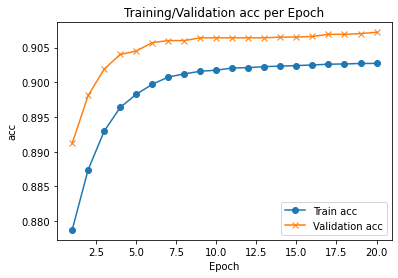

In [26]:

import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.show()


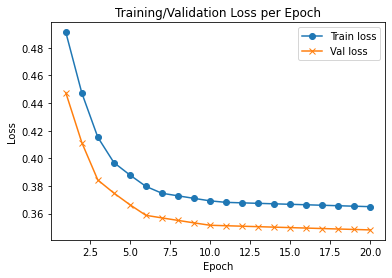

In [27]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train loss', "Val loss"], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()


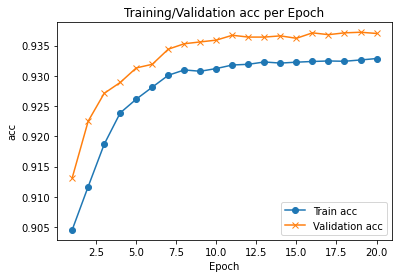

In [28]:

import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist_relu.history['accuracy'], 'o-')
ax.plot([None] + hist_relu.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.show()


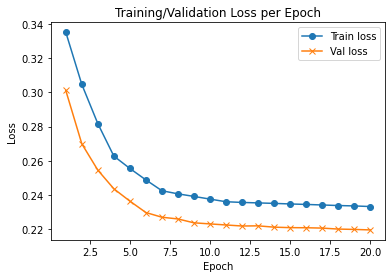

In [29]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist_relu.history['loss'], 'o-')
ax.plot([None] + hist_relu.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train loss', "Val loss"], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()
